In [13]:
import os
import sys
import fitsio
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
import astropy.io.fits as fits

from   astropy.table import Table

In [14]:
#sys.path.append('/global/homes/m/mjwilson/desi/BGS/Sam/DESI/')

#sys.path.append('/global/u2/l/ldrm11/DESI/')

user = os.environ['USER']
sys.path.append('/cosma/home/durham/{}/DESI'.format(user))

In [15]:
from schechter import schechter, named_schechter
from gama_limits import gama_field
from delta8_limits import d8_limits, delta8_tier

In [16]:
#root = os.environ['CSCRATCH'] + '/norberg/GAMA4/'

root = '/cosma/home/durham/{}/data/GAMA4/'.format(user)

fpath = root + 'gama_gold_ddp_n8.fits'
fpath

'/cosma/home/durham/dc-moor2/data/GAMA4/gama_gold_ddp_n8.fits'

In [17]:
#! ls /global/cscratch1/sd/mjwilson/norberg/GAMA4/

In [18]:
#ddps = fits.open(root + '/global/cscratch1/sd/mjwilson/norberg/GAMA4/gama_gold_ddp_n8.fits')
ddps = fits.open(root+'gama_gold_ddp_n8.fits')
ddps = ddps[1].header
ddps

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  393 / length of dimension 1                          
NAXIS2  =               113687 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   53 / number of table fields                         
TTYPE1  = 'CATAID  '                                                            
TFORM1  = 'J       '                                                            
TNULL1  =               999999                                                  
TTYPE2  = 'OBJID   '                                                            
TFORM2  = 'K       '        

In [19]:
#! ls /global/cscratch1/sd/mjwilson/desi/BGS/Sam

In [20]:
field = 'G9'

In [23]:
#randoms = Table.read('/global/cscratch1/sd/mjwilson/desi/BGS/Sam/randoms_bd_ddp_n8_G9_0.fits')
#randoms = Table.read(root + 'randoms_bd_ddp_n8_G9_0.fits')

# TO DO: MOVE RANDOM FILES TO GAMA

#randoms = Table.read(os.environ['CSCRATCH'] + '/desi/BGS/Sam/' + 'randoms_bd_ddp_n8_{}_0.fits'.format(field))

randoms = Table.read('/cosma/home/durham/{}/data/GAMA4/randoms/randoms_bd_ddp_n8_{}_0.fits'.format(user, field))

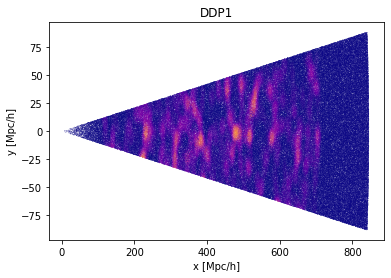

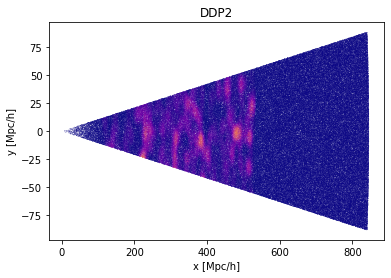

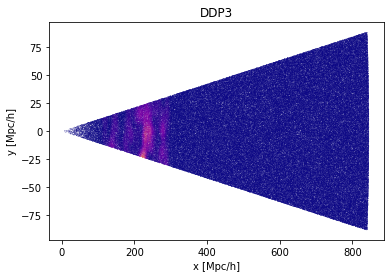

In [24]:
randoms_slice = randoms[np.abs(randoms['CARTESIAN_Z']) < 5.]

for idx in np.arange(1, 4, 1):
    plt.scatter(randoms_slice['CARTESIAN_X'], randoms_slice['CARTESIAN_Y'], c=randoms_slice['DDP{}_DELTA8'.format(idx)], marker='.', lw=0.0, s=1, vmin=-1., vmax=10., cmap='plasma')

    pl.xlabel('x [Mpc/h]')
    pl.ylabel('y [Mpc/h]')
    
    plt.title('DDP{}'.format(idx))
    plt.show()

# d8 volume fractions

In [25]:
tiers  = delta8_tier(randoms['DDP1_DELTA8'])
utiers = np.unique(tiers)

for ut in utiers:
    in_tier = (tiers == ut)
    
    print('{}\t\t{:.3f}'.format(ut, 100. * np.mean(in_tier)))

-99		25.962
0		58.666
1		9.135
2		5.462
3		0.775


In [26]:
lfs  = {}
vs   = {}
ddps = {}

for i in range(4):
    ddps[i] = Table.read(root + 'gama_gold_{}_ddp_n8_d0_{}.fits'.format(field, i))
    vs[i]   = Table.read(root + 'gama_gold_{}_ddp_n8_d0_{}_vmax.fits'.format(field, i))
    lfs[i]  = Table.read(root + 'gama_gold_{}_ddp_n8_d0_{}_lumfn.fits'.format(field, i))

In [29]:
gama_lf

MEDIAN_M,PHI_N,PHI_N_ERROR,PHI_IVMAX,PHI_IVMAX_ERROR,N,V_ON_VMAX,d0_REFSCHECHTER
float64,float64,float64,float64,float64,float64,float64,float64
--,0.0,0.0,0.0,0.0,0.0,--,--
--,0.0,0.0,0.0,0.0,0.0,--,--
--,0.0,0.0,0.0,0.0,0.0,--,--
--,0.0,0.0,0.0,0.0,0.0,--,--
--,0.0,0.0,0.0,0.0,0.0,--,--
--,0.0,0.0,0.0,0.0,0.0,--,--
--,0.0,0.0,0.0,0.0,0.0,--,--
--,0.0,0.0,0.0,0.0,0.0,--,--
--,0.0,0.0,0.0,0.0,0.0,--,--


99
99
99
99


/tmp/ipykernel_230816/2021088444.py:13: RuntimeWarning: divide by zero encountered in log10
  pl.plot(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_IVMAX'] / sc), label=key, marker='.', lw=0.0)
/tmp/ipykernel_230816/2021088444.py:13: RuntimeWarning: divide by zero encountered in log10
  pl.plot(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_IVMAX'] / sc), label=key, marker='.', lw=0.0)
/tmp/ipykernel_230816/2021088444.py:13: RuntimeWarning: divide by zero encountered in log10
  pl.plot(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_IVMAX'] / sc), label=key, marker='.', lw=0.0)
/tmp/ipykernel_230816/2021088444.py:13: RuntimeWarning: divide by zero encountered in log10
  pl.plot(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_IVMAX'] / sc), label=key, marker='.', lw=0.0)


Text(0.5, 1.0, 'G9 GAMA Field')

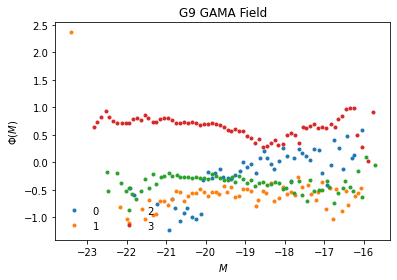

In [30]:
for key in lfs.keys():
    gama_lf = lfs[key]

    #sc = named_schechter(gama_lf['MEDIAN_M'], named_type='TMR')
    #lims = dd8_limits[key]
    #d8 = np.mean(lims)
    #sc *=  (1. + d8) / (1. + 0.007)
    
    #sc = gama_lf['D8_REFSCH']
    sc = gama_lf['d{}_REFSCHECHTER'.format(key)]
    
    
    pl.plot(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_IVMAX'] / sc), label=key, marker='.', lw=0.0)
    print(len(gama_lf['MEDIAN_M']))
    
pl.xlabel(r'$M$')
pl.ylabel(r'$\Phi(M)$')

#pl.ylim(-3.0,   -.5)
#pl.xlim(-15., -23.0)

pl.legend(frameon=False, loc=3, ncol=2)
pl.title('{} GAMA Field'.format(field))

G9 lengths: 
G12 lengths: 21, 23, 25, 21
G15 lengths:


In [ ]:
# TO DO - match rows by median

In [41]:
idx

0

In [42]:
LF_G9.dtype.descr

[('MEDIAN_M', '>f8'),
 ('PHI_N', '>f8'),
 ('PHI_N_ERROR', '>f8'),
 ('PHI_IVMAX', '>f8'),
 ('PHI_IVMAX_ERROR', '>f8'),
 ('N', '>f8'),
 ('V_ON_VMAX', '>f8'),
 ('d0_REFSCHECHTER', '>f8')]

In [47]:
bin_centres

array([-25.45, -25.35, -25.25, -25.15, -25.05, -24.95, -24.85, -24.75,
       -24.65, -24.55, -24.45, -24.35, -24.25, -24.15, -24.05, -23.95,
       -23.85, -23.75, -23.65, -23.55, -23.45, -23.35, -23.25, -23.15,
       -23.05, -22.95, -22.85, -22.75, -22.65, -22.55, -22.45, -22.35,
       -22.25, -22.15, -22.05, -21.95, -21.85, -21.75, -21.65, -21.55,
       -21.45, -21.35, -21.25, -21.15, -21.05, -20.95, -20.85, -20.75,
       -20.65, -20.55, -20.45, -20.35, -20.25, -20.15, -20.05, -19.95,
       -19.85, -19.75, -19.65, -19.55, -19.45, -19.35, -19.25, -19.15,
       -19.05, -18.95, -18.85, -18.75, -18.65, -18.55, -18.45, -18.35,
       -18.25, -18.15, -18.05, -17.95, -17.85, -17.75, -17.65, -17.55,
       -17.45, -17.35, -17.25, -17.15, -17.05, -16.95, -16.85, -16.75,
       -16.65, -16.55, -16.45, -16.35, -16.25, -16.15, -16.05, -15.95,
       -15.85, -15.75, -15.65])

In [49]:
np.array(LF_G9['PHI_IVMAX'] / LF_G9['d{}_REFSCHECHTER'.format(idx)])

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.33775315, 0.25982758, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.17332233, 0.        ,
       0.        , 0.05921675, 0.21488031, 0.14857136, 0.08709395,
       0.11803686, 0.14792944, 0.10001647, 0.09265511, 0.11357061,
       0.48695183, 0.68299675, 0.5159832 , 0.63247639, 0.75729035,
       0.53271657, 0.5242923 , 0.50284676, 0.58329421, 0.69010522,
       1.00316929, 0.81287736, 0.92845298, 0.64676824, 1.20808738,
       1.64654023, 1.20496692, 0.92182565, 0.75012304, 1.06955

In [50]:
x =np.c_[bin_centres, np.array(LF_G9['PHI_IVMAX'] / LF_G9['d{}_REFSCHECHTER'.format(idx)])]

In [37]:
x=np.c_[bin_centres, LF_G9['PHI_IVMAX']/LF_G9['d{}_REFSCHECHTER'.format(idx)], LF_G12['PHI_IVMAX']/LF_G12['d{}_REFSCHECHTER'.format(idx)], LF_G15['PHI_IVMAX']/LF_G15['d{}_REFSCHECHTER'.format(idx)]]


In [38]:
x

AttributeError: 'MaskedColumn' object has no attribute '_unit'

AttributeError: 'MaskedColumn' object has no attribute '_unit'

/tmp/ipykernel_230816/3317625109.py:25: RuntimeWarning: divide by zero encountered in log10
  pl.plot(bin_centres, np.log10(LF_mean), label='d{}'.format(idx), color=colour[idx])
/tmp/ipykernel_230816/3317625109.py:25: RuntimeWarning: divide by zero encountered in log10
  pl.plot(bin_centres, np.log10(LF_mean), label='d{}'.format(idx), color=colour[idx])
/tmp/ipykernel_230816/3317625109.py:25: RuntimeWarning: divide by zero encountered in log10
  pl.plot(bin_centres, np.log10(LF_mean), label='d{}'.format(idx), color=colour[idx])
/tmp/ipykernel_230816/3317625109.py:25: RuntimeWarning: divide by zero encountered in log10
  pl.plot(bin_centres, np.log10(LF_mean), label='d{}'.format(idx), color=colour[idx])


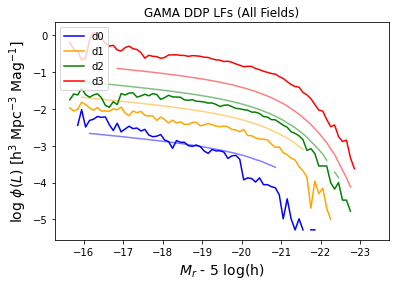

In [57]:
Ms = np.arange(-25.5, -15.5 , 0.1)
bin_centres =  (Ms[1:]+Ms[:-1])/2
colour = ['blue', 'orange', 'green', 'red']

for idx in range(4):
    LF_G9  = Table.read(root + 'gama_gold_G9_ddp_n8_d0_{}_lumfn.fits'.format(idx))
    LF_G12 = Table.read(root + 'gama_gold_G12_ddp_n8_d0_{}_lumfn.fits'.format(idx))
    LF_G15 = Table.read(root + 'gama_gold_G15_ddp_n8_d0_{}_lumfn.fits'.format(idx))

    x =np.c_[bin_centres, np.array(LF_G9['PHI_IVMAX']), np.array(LF_G12['PHI_IVMAX']), np.array(LF_G15['PHI_IVMAX'])]
    #x=np.c_[bin_centres, np.array(LF_G9['PHI_IVMAX']/LF_G9['d{}_REFSCHECHTER'.format(idx)]), np.array(LF_G12['PHI_IVMAX']/LF_G12['d{}_REFSCHECHTER'.format(idx)]), np.array(LF_G15['PHI_IVMAX']/LF_G15['d{}_REFSCHECHTER'.format(idx)])]

    
    x_ref=np.c_[bin_centres, np.array(LF_G9['d{}_REFSCHECHTER'.format(idx)]), np.array(LF_G12['d{}_REFSCHECHTER'.format(idx)]), np.array(LF_G15['d{}_REFSCHECHTER'.format(idx)])]

    
    #x=np.c_[bin_centres, np.array(LF_G9['PHI_IVMAX']/LF_G9['d{}_REFSCHECHTER'.format(idx)]), np.array(LF_G12['PHI_IVMAX']/LF_G12['d{}_REFSCHECHTER'.format(idx)]), np.array(LF_G15['PHI_IVMAX']/LF_G15['d{}_REFSCHECHTER'.format(idx)])]

    LF_mean = np.mean(x[:,1:], axis=1)
    LF_std = np.std(x[:,1:], axis=1) / np.sqrt(3)

    LF_ref_mean = np.mean(x_ref[:,1:], axis=1)
    LF_ref_std = np.std(x_ref[:,1:], axis=1) / np.sqrt(3)
    
    pl.plot(bin_centres, np.log10(LF_mean), label='d{}'.format(idx), color=colour[idx])
    pl.plot(bin_centres, np.log10(LF_ref_mean), alpha=0.5, color=colour[idx])
    #pl.errorbar(bin_centres, np.log10(LF_mean), np.log10(LF_std), label='d{}'.format(idx))
    
    #pl.errorbar(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_N']), gama_lf['PHI_N_ERROR'] / gama_lf['PHI_N'] / np.log(10.), label='NOWEIGHT', alpha=0.4)
    #pl.errorbar(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_IVMAX']), gama_lf['PHI_IVMAX_ERROR'] / gama_lf['PHI_IVMAX'] / np.log(10.), label='IVMAX')

    

plt.xlabel(r'$M_r$ - 5 log(h)', fontsize=14)
plt.ylabel(r'log $\phi(L)$ [h$^3$ Mpc$^{-3}$ Mag$^{-1}$]', fontsize=14)

plt.title(r'GAMA DDP LFs (All Fields)')

#pl.ylim(-4.25, -.75)
#pl.xlim(-23., -15.5)
pl.gca().invert_xaxis()
pl.legend(frameon=True, loc=2)
pl.show()

/tmp/ipykernel_230816/2947710603.py:20: RuntimeWarning: divide by zero encountered in log10
  pl.plot(bin_centres, np.log10(LF_mean), label='d{}'.format(idx), color=colour[idx])
/tmp/ipykernel_230816/2947710603.py:20: RuntimeWarning: divide by zero encountered in log10
  pl.plot(bin_centres, np.log10(LF_mean), label='d{}'.format(idx), color=colour[idx])
/tmp/ipykernel_230816/2947710603.py:20: RuntimeWarning: divide by zero encountered in log10
  pl.plot(bin_centres, np.log10(LF_mean), label='d{}'.format(idx), color=colour[idx])
/tmp/ipykernel_230816/2947710603.py:20: RuntimeWarning: divide by zero encountered in log10
  pl.plot(bin_centres, np.log10(LF_mean), label='d{}'.format(idx), color=colour[idx])


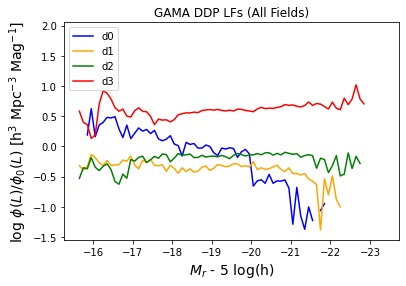

In [59]:
for idx in range(4):
    LF_G9  = Table.read(root + 'gama_gold_G9_ddp_n8_d0_{}_lumfn.fits'.format(idx))
    LF_G12 = Table.read(root + 'gama_gold_G12_ddp_n8_d0_{}_lumfn.fits'.format(idx))
    LF_G15 = Table.read(root + 'gama_gold_G15_ddp_n8_d0_{}_lumfn.fits'.format(idx))

    #x =np.c_[bin_centres, np.array(LF_G9['PHI_IVMAX']), np.array(LF_G12['PHI_IVMAX']), np.array(LF_G15['PHI_IVMAX'])]
    x=np.c_[bin_centres, np.array(LF_G9['PHI_IVMAX']/LF_G9['d{}_REFSCHECHTER'.format(idx)]), np.array(LF_G12['PHI_IVMAX']/LF_G12['d{}_REFSCHECHTER'.format(idx)]), np.array(LF_G15['PHI_IVMAX']/LF_G15['d{}_REFSCHECHTER'.format(idx)])]

    #x_ref=np.c_[bin_centres, np.array(LF_G9['d{}_REFSCHECHTER'.format(idx)]), np.array(LF_G12['d{}_REFSCHECHTER'.format(idx)]), np.array(LF_G15['d{}_REFSCHECHTER'.format(idx)])]

    
    #x=np.c_[bin_centres, np.array(LF_G9['PHI_IVMAX']/LF_G9['d{}_REFSCHECHTER'.format(idx)]), np.array(LF_G12['PHI_IVMAX']/LF_G12['d{}_REFSCHECHTER'.format(idx)]), np.array(LF_G15['PHI_IVMAX']/LF_G15['d{}_REFSCHECHTER'.format(idx)])]

    LF_mean = np.mean(x[:,1:], axis=1)
    LF_std = np.std(x[:,1:], axis=1) / np.sqrt(3)

    #LF_ref_mean = np.mean(x_ref[:,1:], axis=1)
    #LF_ref_std = np.std(x_ref[:,1:], axis=1) / np.sqrt(3)
    
    pl.plot(bin_centres, np.log10(LF_mean), label='d{}'.format(idx), color=colour[idx])
    #pl.plot(bin_centres, np.log10(LF_ref_mean), alpha=0.5, color=colour[idx])
    #pl.errorbar(bin_centres, np.log10(LF_mean), np.log10(LF_std), label='d{}'.format(idx))
    
    #pl.errorbar(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_N']), gama_lf['PHI_N_ERROR'] / gama_lf['PHI_N'] / np.log(10.), label='NOWEIGHT', alpha=0.4)
    #pl.errorbar(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_IVMAX']), gama_lf['PHI_IVMAX_ERROR'] / gama_lf['PHI_IVMAX'] / np.log(10.), label='IVMAX')

    

plt.xlabel(r'$M_r$ - 5 log(h)', fontsize=14)
plt.ylabel(r'log $\phi(L) / \phi_0(L)$ [h$^3$ Mpc$^{-3}$ Mag$^{-1}$]', fontsize=14)

plt.title(r'GAMA DDP LFs (All Fields)')

#pl.ylim(-4.25, -.75)
#pl.xlim(-23., -15.5)
pl.gca().invert_xaxis()
pl.legend(frameon=True, loc=2)
pl.show()

In [ ]:
rand

In [68]:
rpath = '/cosma/home/durham/{}/data/GAMA4/randoms/randoms_bd_ddp_n8_{}_0.fits'.format(user, field)

rand = Table.read(rpath)
print('FSCALE')
for idx in range(4):
    fscale = rand.meta['DDP1_d{}_VOLFRAC'.format(idx)]
    print('d{}'.format(idx), fscale)

FSCALE
d0 0.3007769227978894
d1 0.1547111582781389
d2 0.09317957957064156
d3 0.01326154106585288


# Done.